In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from itertools import cycle, islice, product
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.mixture import GaussianMixture

In [2]:
dataset = pd.read_csv('milknew.csv')

In [3]:
# Первые 5 строк датасета
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
# Размер датасета - 1059 строк, 8 колонок
dataset.shape

(1059, 8)

In [5]:
dataset.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [6]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in dataset.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = dataset[dataset[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

pH - 0
Temprature - 0
Taste - 0
Odor - 0
Fat  - 0
Turbidity - 0
Colour - 0
Grade - 0


In [7]:
# Основные статистические характеристки набора данных
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [8]:
copied_ds = dataset.copy()

for col in dataset.select_dtypes(include=['object']).columns:
    copied_ds[col] = copied_ds[col].astype('string')
dataset = copied_ds

In [9]:
#############
#############
#############
#############
#############

In [10]:
D1 = pd.DataFrame(data=dataset, columns=['pH', 'Temprature', 'Taste', 'Colour'])
D1

,pH,Temprature,Taste,Colour
0,6.6,35,1,254
1,6.6,36,0,253
2,8.5,70,1,246
3,9.5,34,1,255
4,6.6,37,0,255
...,...,...,...,...
1054,6.7,45,1,247
1055,6.7,38,1,255
1056,3.0,40,1,255
1057,6.8,43,1,250


In [11]:
pca = PCA(n_components=2)
D2 = pca.fit_transform(D1)
print('Доля объясненной дисперсии: {}, сумма = {}'.format(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)))

Доля объясненной дисперсии: [0.83186418 0.15163034], сумма = 0.9834945285974658


In [12]:
le = LabelEncoder()
milk_y_ds_le = le.fit_transform(dataset['Grade'])
milk_y_ds_le

array([0, 0, 1, ..., 1, 0, 1])

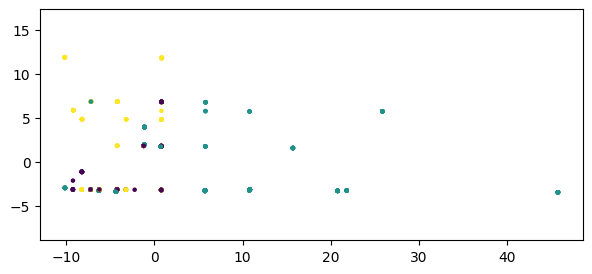

In [13]:
plt.figure(figsize=(7,3))
plt.scatter(D2[:, 0], D2[:, 1], s=5, c=milk_y_ds_le)
plt.axis('equal')
plt.show()

In [14]:
#############
#############
#############
#############
#############

In [15]:
tsne = TSNE(n_components=2)
D3 = tsne.fit_transform(D1)

C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


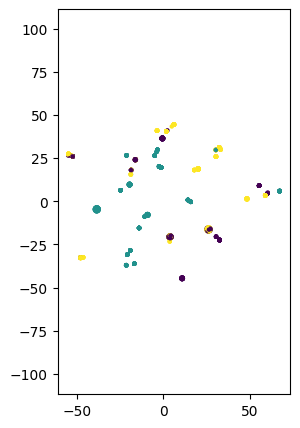

In [16]:
plt.figure(figsize=(3,5))
plt.scatter(D3[:, 0], D3[:, 1], s=5, c=milk_y_ds_le)
plt.axis('equal')
plt.show()

In [17]:
#############
#############
#############
#############
#############

In [18]:
def do_clustering(cluster_datasets, method):
    """
    Выполнение кластеризации для данных примера
    """
    cluster_results = []
    for X in cluster_datasets:
        temp_cluster = method.fit_predict(X)
        cluster_results.append(temp_cluster)
    return cluster_results

In [19]:
def visualize_clusters(cluster_datasets, cluster_results):
    """
    Визуализация результатов кластерного анализа
    """
    plt.subplots(figsize=(10,7))
    plot_num = 0
    for X, y_pred in zip(cluster_datasets, cluster_results):
        plot_num += 1
        plt.subplot(2, 3, plot_num)
        # Цвета точек как результат кластеризации
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # черный цвет для выделяющихся значений
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=3, color=colors[y_pred])
#         plt.xlim(-2.5, 2.5)
#         plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.title(datasets_names[plot_num-1])
    
    plt.show()

In [32]:
cluster_datasets = [D2, D3]
cluster_datasetD1 = [D1]
# cluster_datasets23 = [D2, D3]
datasets_names = ['D2', 'D3']

In [28]:
%time result_KMeans_3 = do_clustering(cluster_datasets, KMeans(n_clusters=3))

Wall time: 44.9 ms


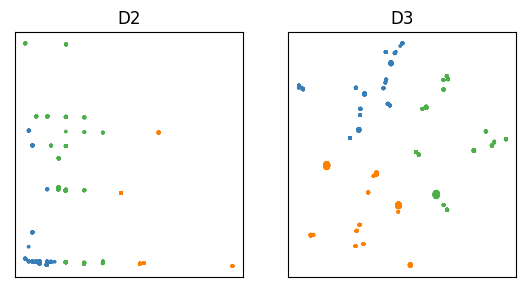

In [29]:
visualize_clusters(cluster_datasets, result_KMeans_3)

In [30]:
result_KMeans_3

[array([0, 0, 1, ..., 0, 2, 2]), array([2, 2, 1, ..., 1, 0, 1])]

In [33]:
%time result_KMeans_3_D1 = do_clustering(cluster_datasetD1, KMeans(n_clusters=3))

Wall time: 23.9 ms


In [34]:
result_KMeans_3_D1

[array([1, 1, 2, ..., 1, 0, 2])]

In [37]:
# Для D1
adjusted_rand_score(milk_y_ds_le, result_KMeans_3_D1[0])

0.059254209186681304

In [38]:
# Для D2
adjusted_rand_score(milk_y_ds_le, result_KMeans_3[0])

0.02446072040732871

In [39]:
# Для D3
adjusted_rand_score(milk_y_ds_le, result_KMeans_3[1])

0.08796486416409402

In [42]:
# Для D1
h1, c1, v1 = homogeneity_completeness_v_measure(milk_y_ds_le, result_KMeans_3_D1[0])
h1, c1, v1

(0.14679807348335938, 0.15901964557224468, 0.15266465061671428)

In [43]:
# Для D2
h2, c2, v2 = homogeneity_completeness_v_measure(milk_y_ds_le, result_KMeans_3[0])
h2, c2, v2

(0.09683479860857132, 0.11038326294390367, 0.10316611357956425)

In [44]:
# Для D3
h3, c3, v3 = homogeneity_completeness_v_measure(milk_y_ds_le, result_KMeans_3[1])
h3, c3, v3

(0.07618895280185105, 0.0746857734982205, 0.07542987499057305)

In [48]:
# Для D1
sscore1 = silhouette_score(cluster_datasetD1[0], result_KMeans_3_D1[0])
sscore1

0.4853147475124691

In [49]:
# Для D2
sscore2 = silhouette_score(cluster_datasets[0], result_KMeans_3[0])
sscore2

0.5027378568484088

In [50]:
# Для D3
sscore3 = silhouette_score(cluster_datasets[1], result_KMeans_3[1])
sscore3

0.45074752

In [ ]:
#############
#############
#############
#############
#############

In [83]:
%time result_DBSCAN = do_clustering(cluster_datasets, DBSCAN(eps=4, min_samples=5))

Wall time: 20.9 ms


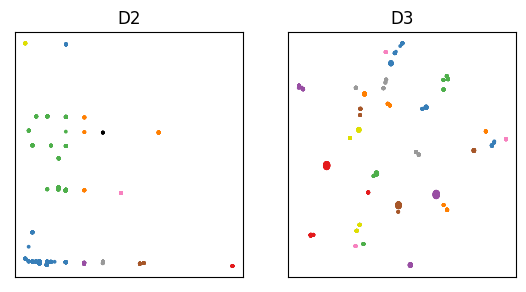

In [84]:
visualize_clusters(cluster_datasets, result_DBSCAN)

In [88]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [89]:
%%time
eps_search_values = np.arange(0.02, 1, 0.02)
min_pts_search_values = np.arange(2, 50, 2)
segm_pars = list(product(eps_search_values, min_pts_search_values))
# segm_pars
checked_eps = []
checked_min_pts = []
clusters_cnt = []
for i in segm_pars:
    search_clustering = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D1)
    checked_eps.append(i[0])
    checked_min_pts.append(i[1])
    clusters_cnt.append(len(np.unique(search_clustering.labels_)))
zipped_data = list(zip(checked_eps, checked_min_pts, clusters_cnt))
check_df = pd.DataFrame(zipped_data, columns=['eps', 'min_pts', 'clusters_cnt'])
check_df

Wall time: 6.87 s


,eps,min_pts,clusters_cnt
0,0.02,2,53
1,0.02,4,49
2,0.02,6,44
3,0.02,8,40
4,0.02,10,36
5,0.02,12,36
6,0.02,14,34
7,0.02,16,31
8,0.02,18,28
9,0.02,20,24


In [93]:
check_df_3 = check_df[check_df['clusters_cnt']==4]
check_df_3

,eps,min_pts,clusters_cnt
20,0.02,42,4
21,0.02,44,4
22,0.02,46,4
23,0.02,48,4
44,0.04,42,4
45,0.04,44,4
46,0.04,46,4
47,0.04,48,4
68,0.06,42,4
69,0.06,44,4


In [105]:
%time result_DBSCAN_D1 = do_clustering(cluster_datasetD1, DBSCAN(eps=0.02, min_samples=42))

Wall time: 14 ms


In [106]:
result_DBSCAN_D1[0]

array([-1, -1, -1, ...,  2, -1, -1], dtype=int64)

In [107]:
# Для D1
adjusted_rand_score(milk_y_ds_le, result_DBSCAN_D1[0])

0.024332700928605604

In [182]:
# Для D1
h1_DBSCAN, c1_DBSCAN, v1_DBSCAN = homogeneity_completeness_v_measure(milk_y_ds_le, result_DBSCAN_D1[0])
h1_DBSCAN, c1_DBSCAN, v1_DBSCAN

(0.11967226208541941, 0.18509076884118614, 0.14536035378706105)

In [109]:
%%time
eps_search_values = np.arange(0.02, 1, 0.02)
min_pts_search_values = np.arange(2, 50, 2)
segm_pars = list(product(eps_search_values, min_pts_search_values))
# segm_pars
checked_eps = []
checked_min_pts = []
clusters_cnt = []
for i in segm_pars:
    search_clustering = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D2)
    checked_eps.append(i[0])
    checked_min_pts.append(i[1])
    clusters_cnt.append(len(np.unique(search_clustering.labels_)))
zipped_data = list(zip(checked_eps, checked_min_pts, clusters_cnt))
check_df = pd.DataFrame(zipped_data, columns=['eps', 'min_pts', 'clusters_cnt'])
check_df

Wall time: 4.36 s


,eps,min_pts,clusters_cnt
0,0.02,2,41
1,0.02,4,40
2,0.02,6,38
3,0.02,8,35
4,0.02,10,34
5,0.02,12,34
6,0.02,14,32
7,0.02,16,30
8,0.02,18,25
9,0.02,20,22


In [110]:
check_df_3 = check_df[check_df['clusters_cnt']==4]
check_df_3

,eps,min_pts,clusters_cnt


In [112]:
check_df_5 = check_df[check_df['clusters_cnt']==6]
check_df_5

,eps,min_pts,clusters_cnt
20,0.02,42,6
21,0.02,44,6
22,0.02,46,6
23,0.02,48,6
44,0.04,42,6
45,0.04,44,6
46,0.04,46,6
47,0.04,48,6
68,0.06,42,6
69,0.06,44,6


In [113]:
cluster_datasetD2 = [D2]

In [121]:
%time result_DBSCAN_D2 = do_clustering(cluster_datasetD2, DBSCAN(eps=0.1, min_samples=38))

Wall time: 9.01 ms


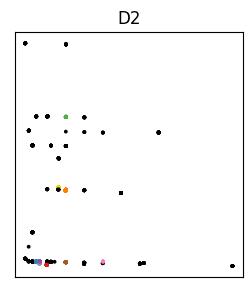

In [122]:
visualize_clusters(cluster_datasetD2, result_DBSCAN_D2)

In [119]:
%%time
eps_search_values_sil2 = np.arange(0.02, 1, 0.02)
min_pts_search_values_sil2 = np.arange(2, 50, 2)
segm_pars_sil2 = list(product(eps_search_values_sil2, min_pts_search_values_sil2))
# segm_pars_sil2
checked_eps_sil2 = []
checked_min_pts_sil2 = []
clusters_cnt_sil2 = []
sil_score2 = []
for i in segm_pars_sil2:
    search_clustering_sil2 = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D2)
    checked_eps_sil2.append(i[0])
    checked_min_pts_sil2.append(i[1])
    clusters_cnt_sil2.append(len(np.unique(search_clustering_sil2.labels_)))
    sil_score2.append(metrics.silhouette_score(D2, search_clustering_sil2.labels_))
zipped_data_sil2 = list(zip(checked_eps_sil2, checked_min_pts_sil2, clusters_cnt_sil2, sil_score2))
check_df_sil2 = pd.DataFrame(zipped_data_sil2, columns=['eps', 'min_pts', 'clusters_cnt', 'sil_score'])
check_df_sil2

Wall time: 30.9 s


,eps,min_pts,clusters_cnt,sil_score
0,0.02,2,41,0.979043
1,0.02,4,40,0.973736
2,0.02,6,38,0.960853
3,0.02,8,35,0.931396
4,0.02,10,34,0.915237
5,0.02,12,34,0.915237
6,0.02,14,32,0.876252
7,0.02,16,30,0.830700
8,0.02,18,25,0.692869
9,0.02,20,22,0.605773


In [120]:
check_df_some = check_df_sil2[check_df_sil2['clusters_cnt']<=10]
check_df_some

,eps,min_pts,clusters_cnt,sil_score
13,0.02,28,10,0.152546
14,0.02,30,10,0.152546
15,0.02,32,10,0.152546
16,0.02,34,8,0.073953
17,0.02,36,8,0.073953
18,0.02,38,8,0.073953
19,0.02,40,7,0.056126
20,0.02,42,6,0.047718
21,0.02,44,6,0.047718
22,0.02,46,6,0.047718


Wall time: 7.98 ms


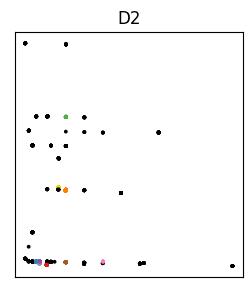

In [123]:
%time result_DBSCAN_D2 = do_clustering(cluster_datasetD2, DBSCAN(eps=0.1, min_samples=38))
visualize_clusters(cluster_datasetD2, result_DBSCAN_D2)

In [124]:
%%time
eps_search_values_sil2 = np.arange(0.02, 5, 0.02)
min_pts_search_values_sil2 = np.arange(2, 50, 2)
segm_pars_sil2 = list(product(eps_search_values_sil2, min_pts_search_values_sil2))
# segm_pars_sil2
checked_eps_sil2 = []
checked_min_pts_sil2 = []
clusters_cnt_sil2 = []
sil_score2 = []
for i in segm_pars_sil2:
    search_clustering_sil2 = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D2)
    checked_eps_sil2.append(i[0])
    checked_min_pts_sil2.append(i[1])
    clusters_cnt_sil2.append(len(np.unique(search_clustering_sil2.labels_)))
    sil_score2.append(metrics.silhouette_score(D2, search_clustering_sil2.labels_))
zipped_data_sil2 = list(zip(checked_eps_sil2, checked_min_pts_sil2, clusters_cnt_sil2, sil_score2))
check_df_sil2 = pd.DataFrame(zipped_data_sil2, columns=['eps', 'min_pts', 'clusters_cnt', 'sil_score'])
check_df_sil2

Wall time: 2min 45s


,eps,min_pts,clusters_cnt,sil_score
0,0.02,2,41,0.979043
1,0.02,4,40,0.973736
2,0.02,6,38,0.960853
3,0.02,8,35,0.931396
4,0.02,10,34,0.915237
5,0.02,12,34,0.915237
6,0.02,14,32,0.876252
7,0.02,16,30,0.830700
8,0.02,18,25,0.692869
9,0.02,20,22,0.605773


In [125]:
check_df_some = check_df_sil2[check_df_sil2['clusters_cnt']<=10]
check_df_some

,eps,min_pts,clusters_cnt,sil_score
13,0.02,28,10,0.152546
14,0.02,30,10,0.152546
15,0.02,32,10,0.152546
16,0.02,34,8,0.073953
17,0.02,36,8,0.073953
18,0.02,38,8,0.073953
19,0.02,40,7,0.056126
20,0.02,42,6,0.047718
21,0.02,44,6,0.047718
22,0.02,46,6,0.047718


Wall time: 14 ms


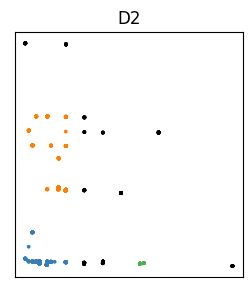

In [130]:
# 4.18, 46
%time result_DBSCAN_D2 = do_clustering(cluster_datasetD2, DBSCAN(eps=4.32, min_samples=46))
visualize_clusters(cluster_datasetD2, result_DBSCAN_D2)

In [131]:
# Для D2
adjusted_rand_score(milk_y_ds_le, result_DBSCAN_D2[0])

0.060508021265971004

In [180]:
# Для D2
h2_DBSCAN, c2_DBSCAN, v2_DBSCAN = homogeneity_completeness_v_measure(milk_y_ds_le, result_DBSCAN_D2[0])
h2_DBSCAN, c2_DBSCAN, v2_DBSCAN

(0.15309546101342894, 0.14214812089119305, 0.14741883267802983)

In [141]:
%%time
eps_search_values_sil3 = np.arange(0.1, 4, 0.02)
min_pts_search_values_sil3 = np.arange(10, 50, 2)
segm_pars_sil3 = list(product(eps_search_values_sil3, min_pts_search_values_sil3))
# segm_pars_sil3
checked_eps_sil3 = []
checked_min_pts_sil3 = []
clusters_cnt_sil3 = []
sil_score3 = []
for i in segm_pars_sil3:
    search_clustering_sil3 = DBSCAN(eps=i[0], min_samples=i[1], algorithm='ball_tree').fit(D3)
    checked_eps_sil3.append(i[0])
    checked_min_pts_sil3.append(i[1])
    clusters_cnt_sil3.append(len(np.unique(search_clustering_sil3.labels_)))
    sil_score3.append(metrics.silhouette_score(D3, search_clustering_sil3.labels_))
zipped_data_sil3 = list(zip(checked_eps_sil3, checked_min_pts_sil3, clusters_cnt_sil3, sil_score3))
check_df_sil3 = pd.DataFrame(zipped_data_sil3, columns=['eps', 'min_pts', 'clusters_cnt', 'sil_score'])
check_df_sil3

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [138]:
cluster_datasetD3 = [D3]

Wall time: 12 ms


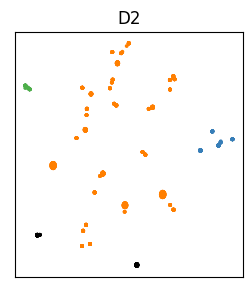

In [175]:
# 20.5, 40
%time result_DBSCAN_D3 = do_clustering(cluster_datasetD3, DBSCAN(eps=20.5, min_samples=40))
visualize_clusters(cluster_datasetD3, result_DBSCAN_D3)

In [166]:
# Для D3
adjusted_rand_score(milk_y_ds_le, result_DBSCAN_D3[0])

0.07000307697634539

In [181]:
# Для D3
h3_DBSCAN, c3_DBSCAN, v3_DBSCAN = homogeneity_completeness_v_measure(milk_y_ds_le, result_DBSCAN_D3[0])
h3_DBSCAN, c3_DBSCAN, v3_DBSCAN

(0.07609042310170347, 0.10883519064580462, 0.08956374984268964)

In [ ]:
#############
#############
#############
#############
#############

In [178]:
%time result_GaussianMixtureD1 = do_clustering(cluster_datasetD1, GaussianMixture(n_components=3))

Wall time: 102 ms


In [179]:
# Для D1
adjusted_rand_score(milk_y_ds_le, result_GaussianMixtureD1[0])

0.02067380058957769

In [183]:
# Для D1
h1_Gaus, c1_Gaus, v1_Gaus = homogeneity_completeness_v_measure(milk_y_ds_le, result_GaussianMixtureD1[0])
h1_Gaus, c1_Gaus, v1_Gaus

(0.03346160307660244, 0.0386386087815359, 0.03586424386723746)

Wall time: 8.98 ms


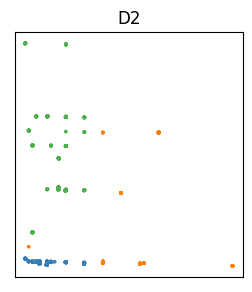

In [190]:
%time result_GaussianMixtureD2 = do_clustering(cluster_datasetD2, GaussianMixture(n_components=3))
visualize_clusters(cluster_datasetD2, result_GaussianMixtureD2)

In [191]:
# Для D2
adjusted_rand_score(milk_y_ds_le, result_GaussianMixtureD2[0])

0.05005778011328275

In [192]:
# Для D2
h2_Gaus, c2_Gaus, v2_Gaus = homogeneity_completeness_v_measure(milk_y_ds_le, result_GaussianMixtureD2[0])
h2_Gaus, c2_Gaus, v2_Gaus

(0.13542628810658383, 0.14650337214277492, 0.1407472194791086)

Wall time: 12 ms


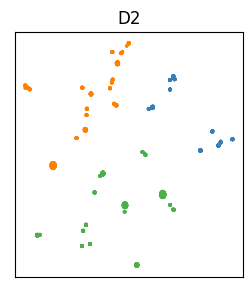

In [198]:
%time result_GaussianMixtureD3 = do_clustering(cluster_datasetD3, GaussianMixture(n_components=3))
visualize_clusters(cluster_datasetD3, result_GaussianMixtureD3)

In [202]:
# Для D3
adjusted_rand_score(milk_y_ds_le, result_GaussianMixtureD3[0])

0.06649268142706458

In [200]:
# Для D3
h3_Gaus, c3_Gaus, v3_Gaus = homogeneity_completeness_v_measure(milk_y_ds_le, result_GaussianMixtureD3[0])
h3_Gaus, c3_Gaus, v3_Gaus

(0.07844555563864825, 0.07997395468356099, 0.07920238232036125)